    OBJECTID                     Name        Acres Neighborho  SqMiles  \
0         27               Roslindale  1605.568237         15     2.51   
1         28            Jamaica Plain  2519.245394         11     3.94   
2         29             Mission Hill   350.853564         13     0.55   
3         30                 Longwood   188.611947         28     0.29   
4         31              Bay Village    26.539839         33     0.04   
5         32         Leather District    15.639908         27     0.02   
6         33                Chinatown    76.324410         26     0.12   
7         34                North End   126.910439         14     0.20   
8         35                  Roxbury  2108.469072         16     3.29   
9         36                South End   471.535356         32     0.74   
10        37                 Back Bay   399.314411          2     0.62   
11        38              East Boston  3012.059593          8     4.71   
12        39              Charlestown 

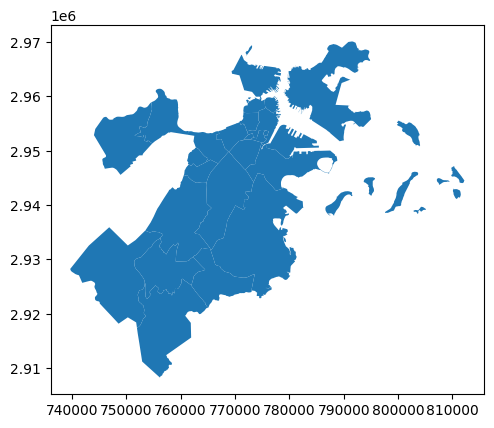

In [18]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# load the shapefile
shapefile_path1 = "../data/Boston_Neighborhoods/Boston_Neighborhoods.shp"
tracts1 = gpd.read_file(shapefile_path1)

# print(tracts.crs)  # 查看数据对应的投影信息
print(tracts1)  # 查看前5行数据
tracts1.plot()
plt.show()#简单展示


<Figure size 5000x5000 with 0 Axes>

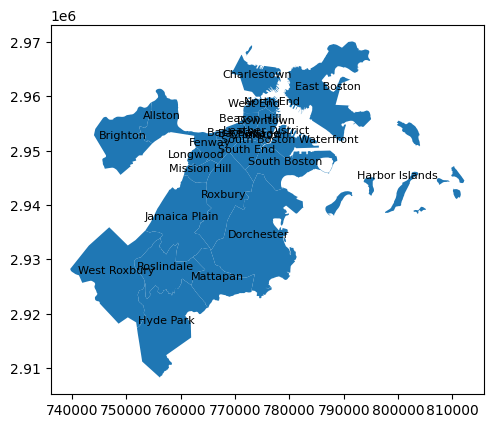

In [41]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 加载 shapefile
shapefile_path1 = "../data/Boston_Neighborhoods/Boston_Neighborhoods.shp"
tracts1 = gpd.read_file(shapefile_path1)

# 设置大尺寸图像
plt.figure(figsize=(50, 50))

# 绘制地图
tracts1.plot()

# 添加地区名称标签
for x, y, label in zip(tracts1.geometry.centroid.x, tracts1.geometry.centroid.y, tracts1['Name']):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points", ha='center', fontsize=8)

# 显示地图
plt.show()


   OBJECTID STATEFP20 COUNTYFP20 TRACTCE20      GEOID20   NAME20  \
0         1        25        025    140202  25025140202  1402.02   
1         2        25        025    140300  25025140300     1403   
2         3        25        025    140400  25025140400     1404   
3         4        25        025    140106  25025140106  1401.06   
4         5        25        025    110201  25025110201  1102.01   

     NAMELSAD20 MTFCC20 FUNCSTAT20  ALAND20  AWATER20   INTPTLAT20  \
0  Census Tract   G5020          S  1538599     17120  +42.2495181   
1  Census Tract   G5020          S  1548879     38736  +42.2587734   
2  Census Tract   G5020          S  1874512     11680  +42.2692219   
3  Census Tract   G5020          S   278837      3116  +42.2738738   
4  Census Tract   G5020          S   348208         0  +42.2804960   

     INTPTLON20    Shape_STAr    Shape_STLe  \
0  -071.1175430  1.674441e+07  18525.133039   
1  -071.1188131  1.708768e+07  24186.699503   
2  -071.1118088  2.030132e+07

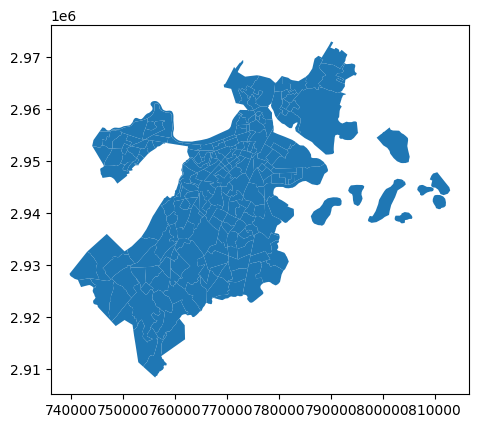

In [19]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# load the shapefile
shapefile_path2 = "../data/census_tract_data/Census2020_Tracts.shp"
tracts2 = gpd.read_file(shapefile_path2)

# print(tracts.crs)  # 查看数据对应的投影信息
print(tracts2.head())  # 查看前5行数据
tracts2.plot()
plt.show()#简单展示

In [ ]:
# perform spatial join using "intersects" relationship
joined = gpd.sjoin(tracts2, tracts1, op='intersects')

# randomly assign each tract in tracts2 to a neighborhood in tracts1
import random
neighborhoods = joined.groupby('index_right').groups.keys()
for neighborhood in neighborhoods:
    tracts = joined[joined['index_right'] == neighborhood]
    tracts2.loc[tracts.index, 'Neighbor'] = random.choice([tracts1.loc[neighborhood, 'Name']] * len(tracts))

tracts2

In [24]:
tracts2.dtypes

OBJECTID         int64
STATEFP20       object
COUNTYFP20      object
TRACTCE20       object
GEOID20         object
NAME20          object
NAMELSAD20      object
MTFCC20         object
FUNCSTAT20      object
ALAND20          int64
AWATER20         int64
INTPTLAT20      object
INTPTLON20      object
Shape_STAr     float64
Shape_STLe     float64
geometry      geometry
dtype: object

In [6]:
tracts1.dtypes

OBJECTID         int64
Name            object
Acres          float64
Neighborho      object
SqMiles        float64
ShapeSTAre     float64
ShapeSTLen     float64
geometry      geometry
dtype: object

/Users/mirackchan/Library/Python/3.9/lib/python/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


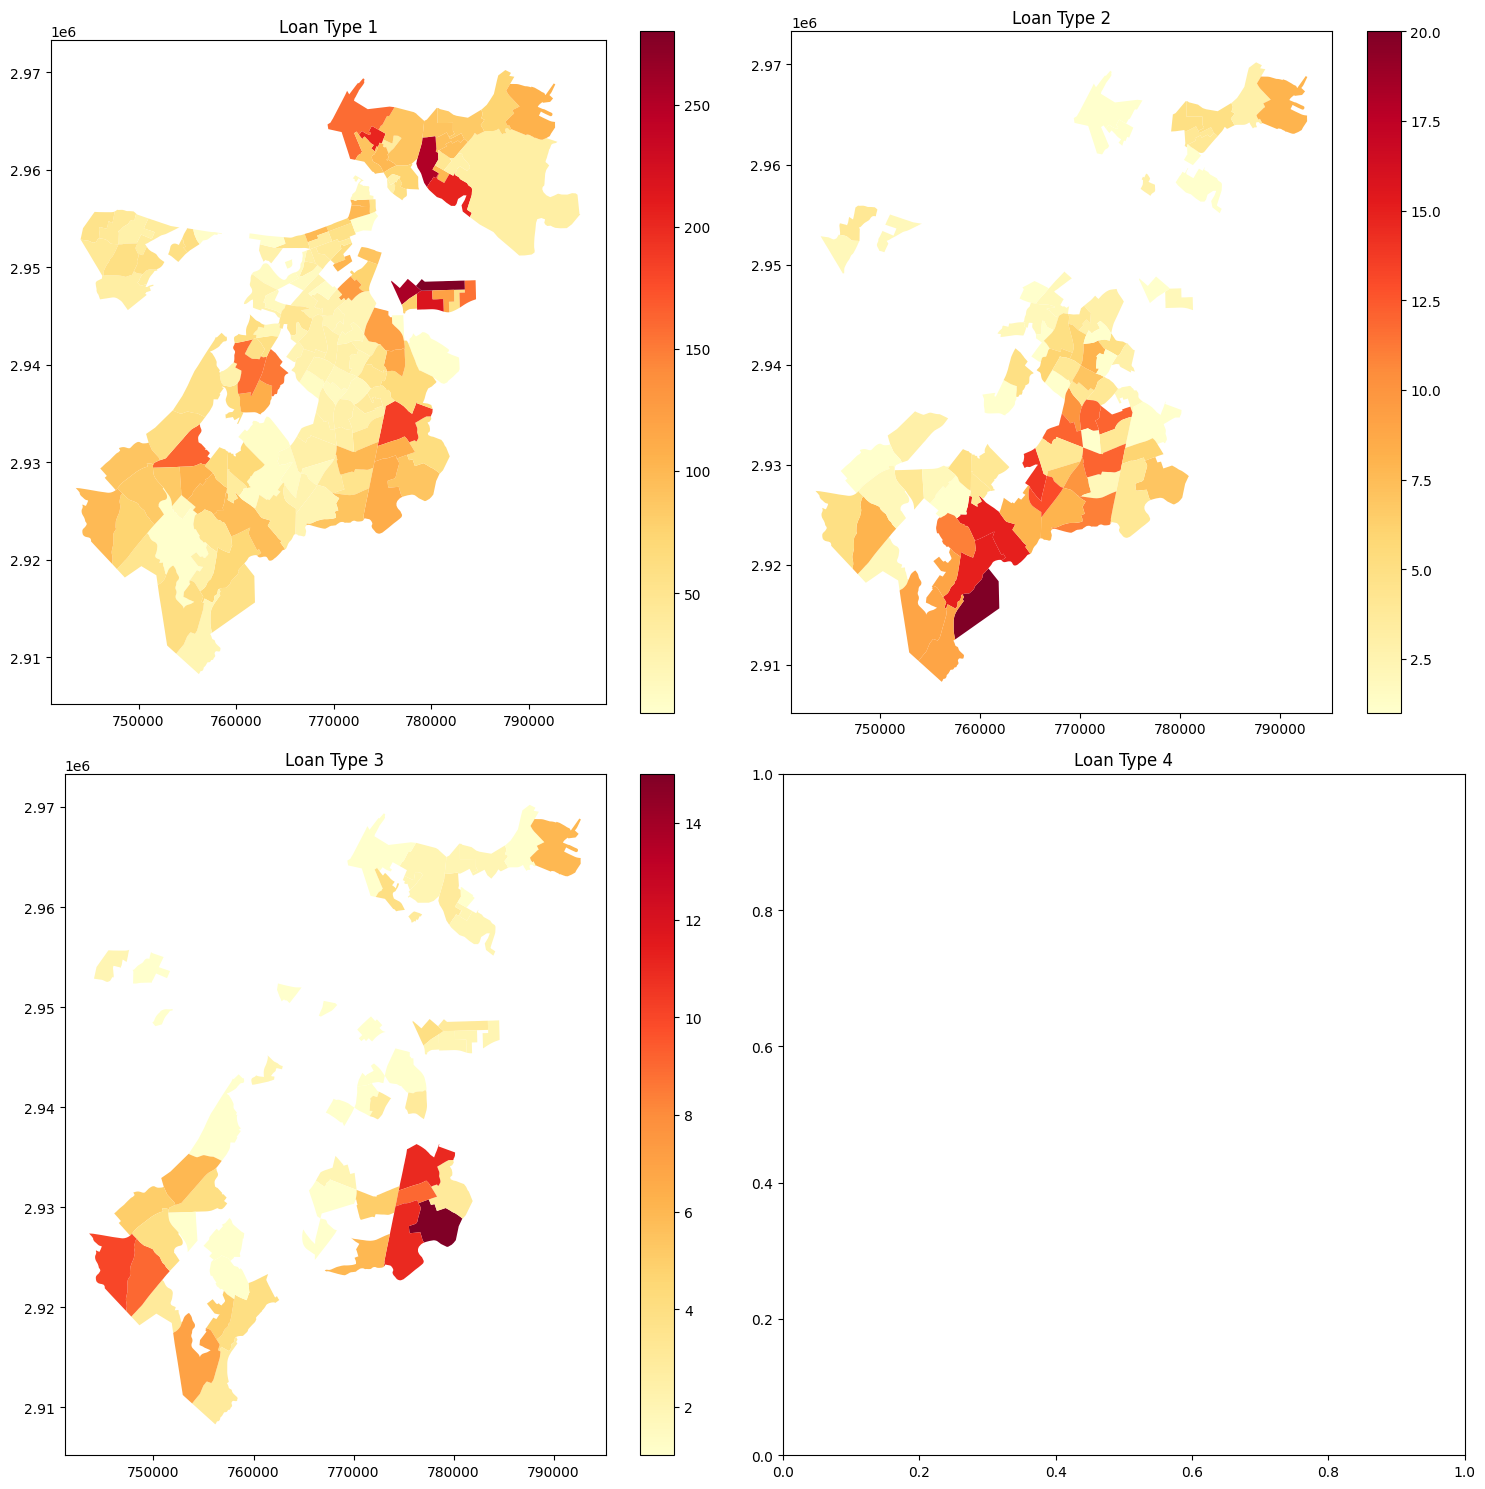

In [28]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
shapefile_path2 = "../data/census_tract_data/Census2020_Tracts.shp"
tracts2 = gpd.read_file(shapefile_path2)
tracts2['GEOID20'] = tracts2['GEOID20'].astype(float)

# Read the loan counts CSV file
loan_counts = pd.read_csv("../data/loan_type_counts_by_censusTract.csv")
loan_counts.rename(columns={'census_tract': 'GEOID20'},inplace=True)

# Merge the loan counts dataframe with the tracts2 geodataframe based on the census_tract column
merged_data = tracts2.merge(loan_counts, on="GEOID20")

# Separate the merged data into different geodataframes for each loan type
loan_type_1 = merged_data[merged_data["loan_type"] == 1]
loan_type_2 = merged_data[merged_data["loan_type"] == 2]
loan_type_3 = merged_data[merged_data["loan_type"] == 3]
loan_type_4 = merged_data[merged_data["loan_type"] == 4]

# Plot the choropleth maps for each loan type
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

loan_type_1.plot(column="count", cmap="YlOrRd", legend=True, ax=axs[0, 0])
axs[0, 0].set_title("Loan Type 1")

loan_type_2.plot(column="count", cmap="YlOrRd", legend=True, ax=axs[0, 1])
axs[0, 1].set_title("Loan Type 2")

loan_type_3.plot(column="count", cmap="YlOrRd", legend=True, ax=axs[1, 0])
axs[1, 0].set_title("Loan Type 3")

loan_type_4.plot(column="count", cmap="YlOrRd", legend=True, ax=axs[1, 1])
axs[1, 1].set_title("Loan Type 4")

plt.tight_layout()
plt.show()


In [7]:
merged_data.dtypes

OBJECTID        int64
STATEFP20      object
COUNTYFP20     object
TRACTCE20      object
GEOID20       float64
NAME20         object
NAMELSAD20     object
MTFCC20        object
FUNCSTAT20     object
ALAND20         int64
AWATER20        int64
INTPTLAT20     object
INTPTLON20     object
Shape_STAr    float64
Shape_STLe    float64
loan_type       int64
count           int64
lat           float64
lon           float64
dtype: object

In [8]:
tracts1.dtypes

OBJECTID         int64
Name            object
Acres          float64
Neighborho      object
SqMiles        float64
ShapeSTAre     float64
ShapeSTLen     float64
geometry      geometry
dtype: object

/Users/mirackchan/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3318: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.

/var/folders/h4/qv9ymlxn5v54y1vnffsnvmlr0000gn/T/ipykernel_84710/3894097642.py:21: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["NAD83 / Massachusetts Mainland (ftUS)",GEO ...
Right CRS: EPSG:2249


/Users/mirackchan/Library/Python/3.9/lib/python/site-packages/geopandas/plotting.py:693: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.



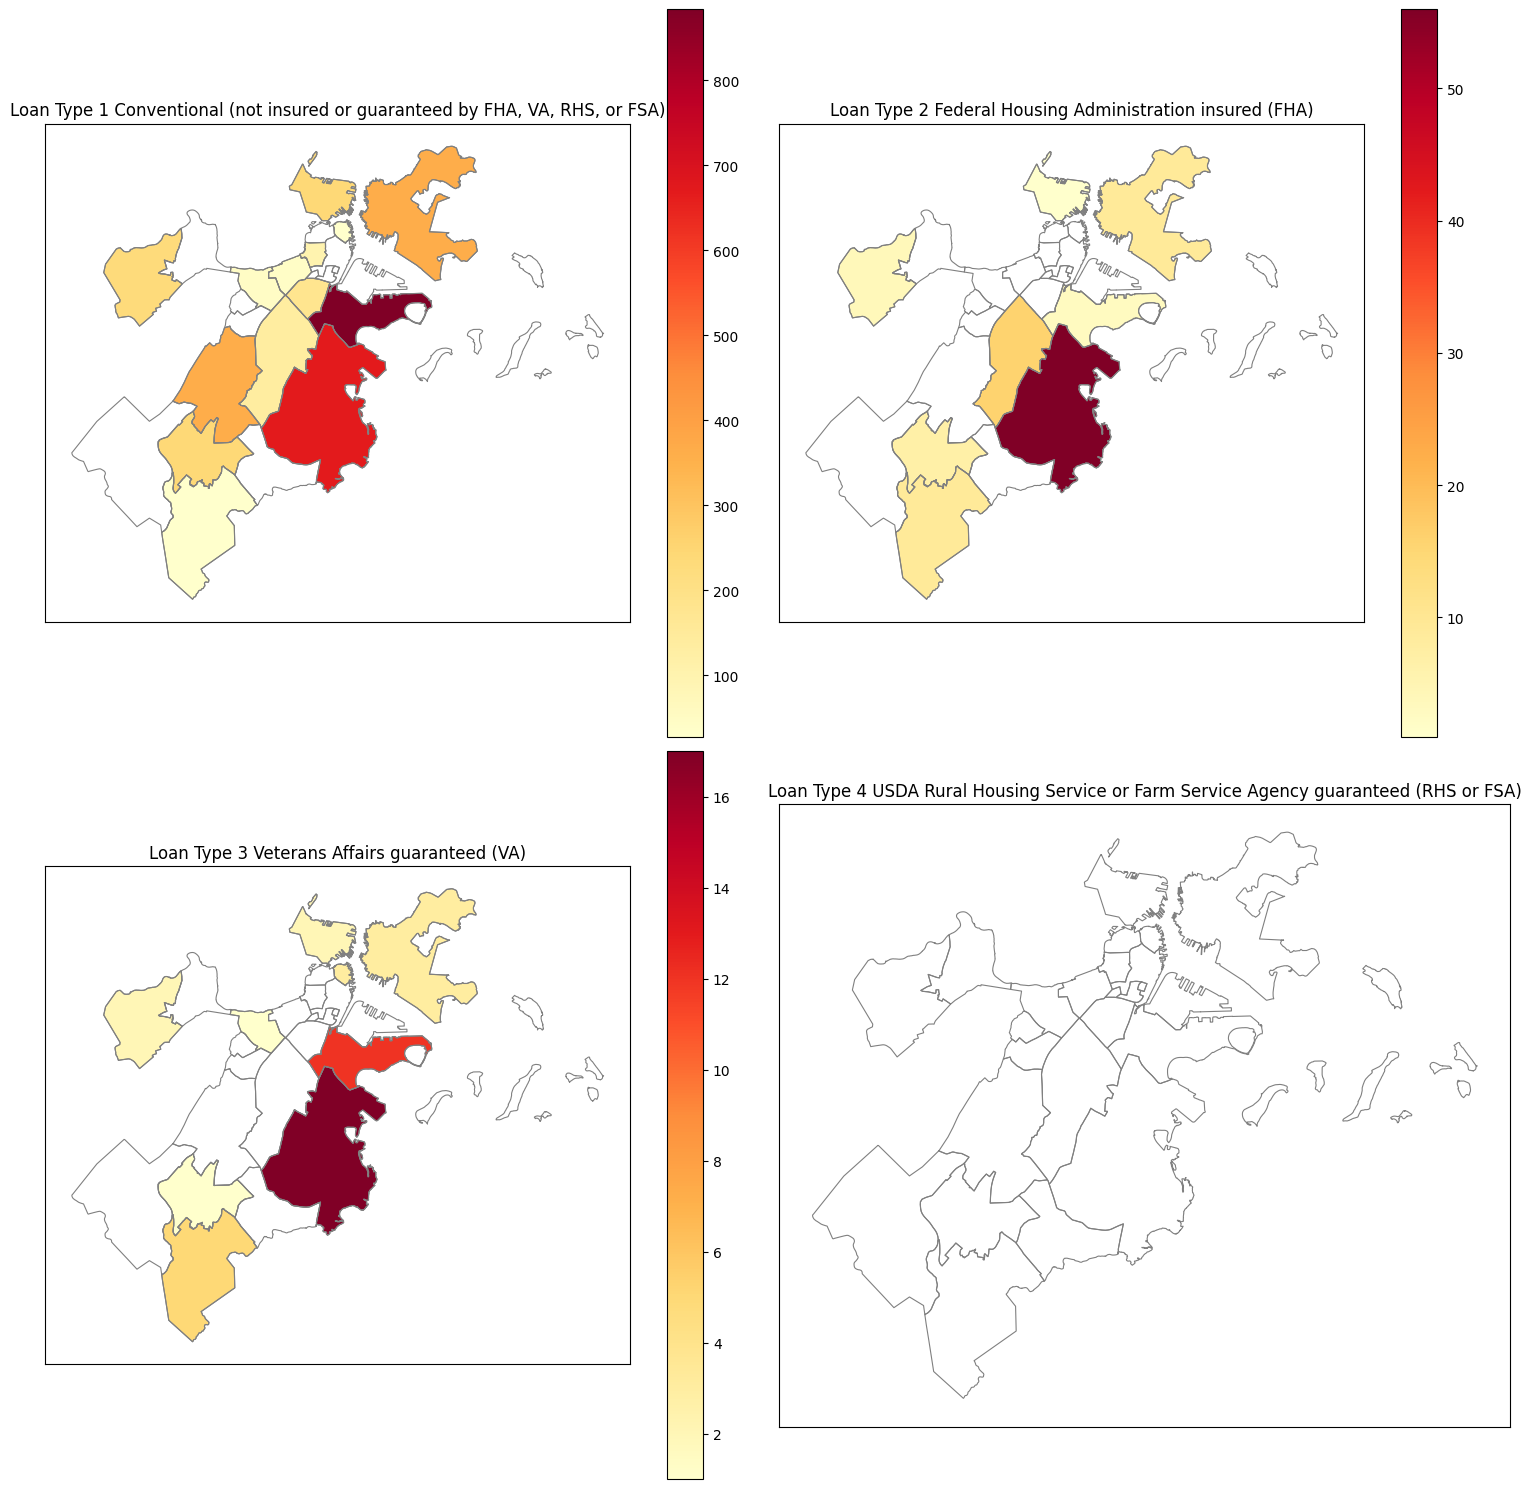

In [34]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefiles
shapefile_path2 = "../data/census_tract_data/Census2020_Tracts.shp"
tracts2 = gpd.read_file(shapefile_path2)
tracts2['GEOID20'] = tracts2['GEOID20'].astype(float)

shapefile_path1 = "../data/Boston_Neighborhoods/Boston_Neighborhoods.shp"
tracts1 = gpd.read_file(shapefile_path1)

# Read the loan counts CSV file
loan_counts = pd.read_csv("../data/loan_type_counts_by_censusTract.csv")
loan_counts.rename(columns={'census_tract': 'GEOID20'}, inplace=True)

# Merge the loan counts dataframe with the tracts2 geodataframe based on the census_tract column
merged_data = tracts2.merge(loan_counts, on="GEOID20")

# Perform a spatial join between the merged_data and tracts1 geodataframes
spatial_join_data = gpd.sjoin(merged_data, tracts1, op="within")

# Group by the Name column in tracts1 and sum the loan counts
aggregated_data = spatial_join_data.groupby(["Name", "loan_type"]).agg({"count": "sum"}).reset_index()

# Merge the aggregated data with tracts1 geodataframe based on the Name column
tracts1_merged = tracts1.merge(aggregated_data, on="Name")

# Separate the merged data into different geodataframes for each loan type
loan_type_1 = tracts1_merged[tracts1_merged["loan_type"] == 1]
loan_type_2 = tracts1_merged[tracts1_merged["loan_type"] == 2]
loan_type_3 = tracts1_merged[tracts1_merged["loan_type"] == 3]
loan_type_4 = tracts1_merged[tracts1_merged["loan_type"] == 4]

# Plot the choropleth maps for each loan type
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

tracts1.boundary.plot(ax=axs[0, 0], edgecolor="grey", linewidth=0.8)
loan_type_1.plot(column="count", cmap="YlOrRd", legend=True, ax=axs[0, 0], edgecolor="grey", linewidth=0.8)
axs[0, 0].set_title("Loan Type 1 Conventional (not insured or guaranteed by FHA, VA, RHS, or FSA)")
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

tracts1.boundary.plot(ax=axs[0, 1], edgecolor="grey", linewidth=0.8)
loan_type_2.plot(column="count", cmap="YlOrRd", legend=True, ax=axs[0, 1], edgecolor="grey", linewidth=0.8)
axs[0, 1].set_title("Loan Type 2 Federal Housing Administration insured (FHA)")
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

tracts1.boundary.plot(ax=axs[1, 0], edgecolor="grey", linewidth=0.8)
loan_type_3.plot(column="count", cmap="YlOrRd", legend=True, ax=axs[1, 0], edgecolor="grey", linewidth=0.8)
axs[1, 0].set_title("Loan Type 3 Veterans Affairs guaranteed (VA)")
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

tracts1.boundary.plot(ax=axs[1, 1], edgecolor="grey", linewidth=0.8)
loan_type_4.plot(column="count", cmap="YlOrRd", legend=True, ax=axs[1, 1], edgecolor="grey", linewidth=0.8)
axs[1, 1].set_title("Loan Type 4 USDA Rural Housing Service or Farm Service Agency guaranteed (RHS or FSA)")
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

plt.tight_layout()
plt.show()



/Users/mirackchan/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3318: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.

/var/folders/h4/qv9ymlxn5v54y1vnffsnvmlr0000gn/T/ipykernel_84710/1392191331.py:25: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["NAD83 / Massachusetts Mainland (ftUS)",GEO ...
Right CRS: EPSG:2249




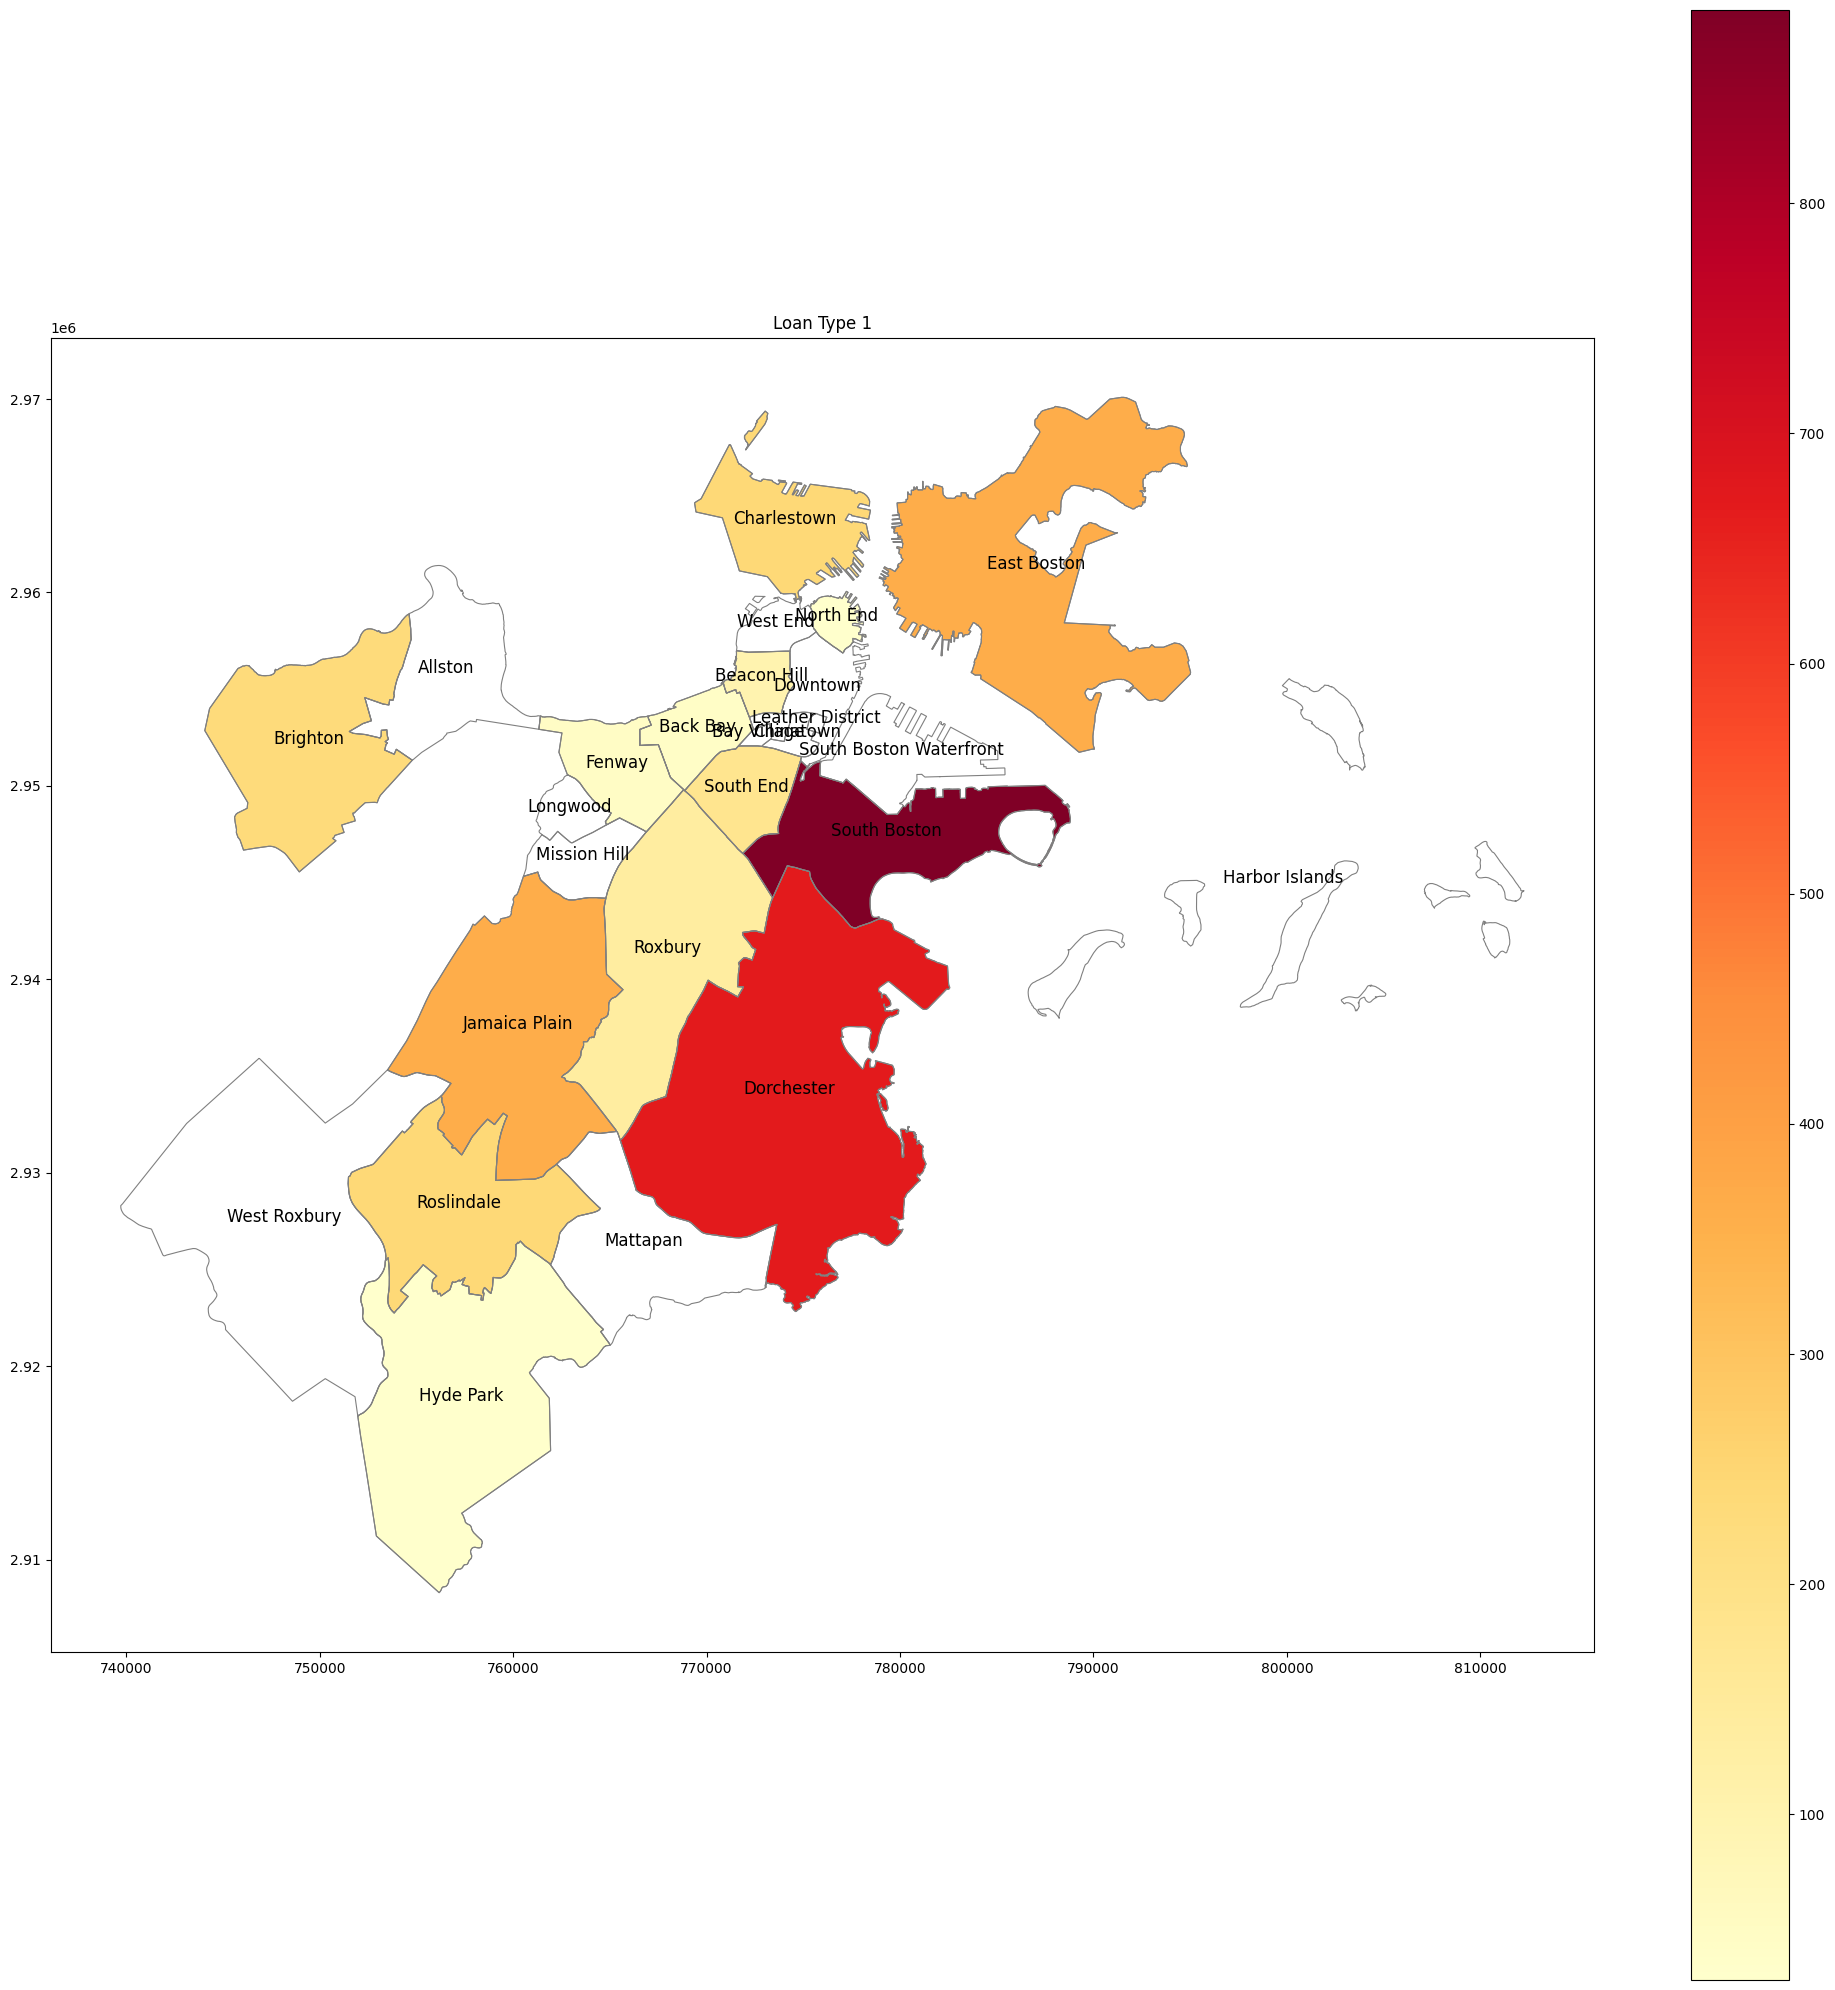

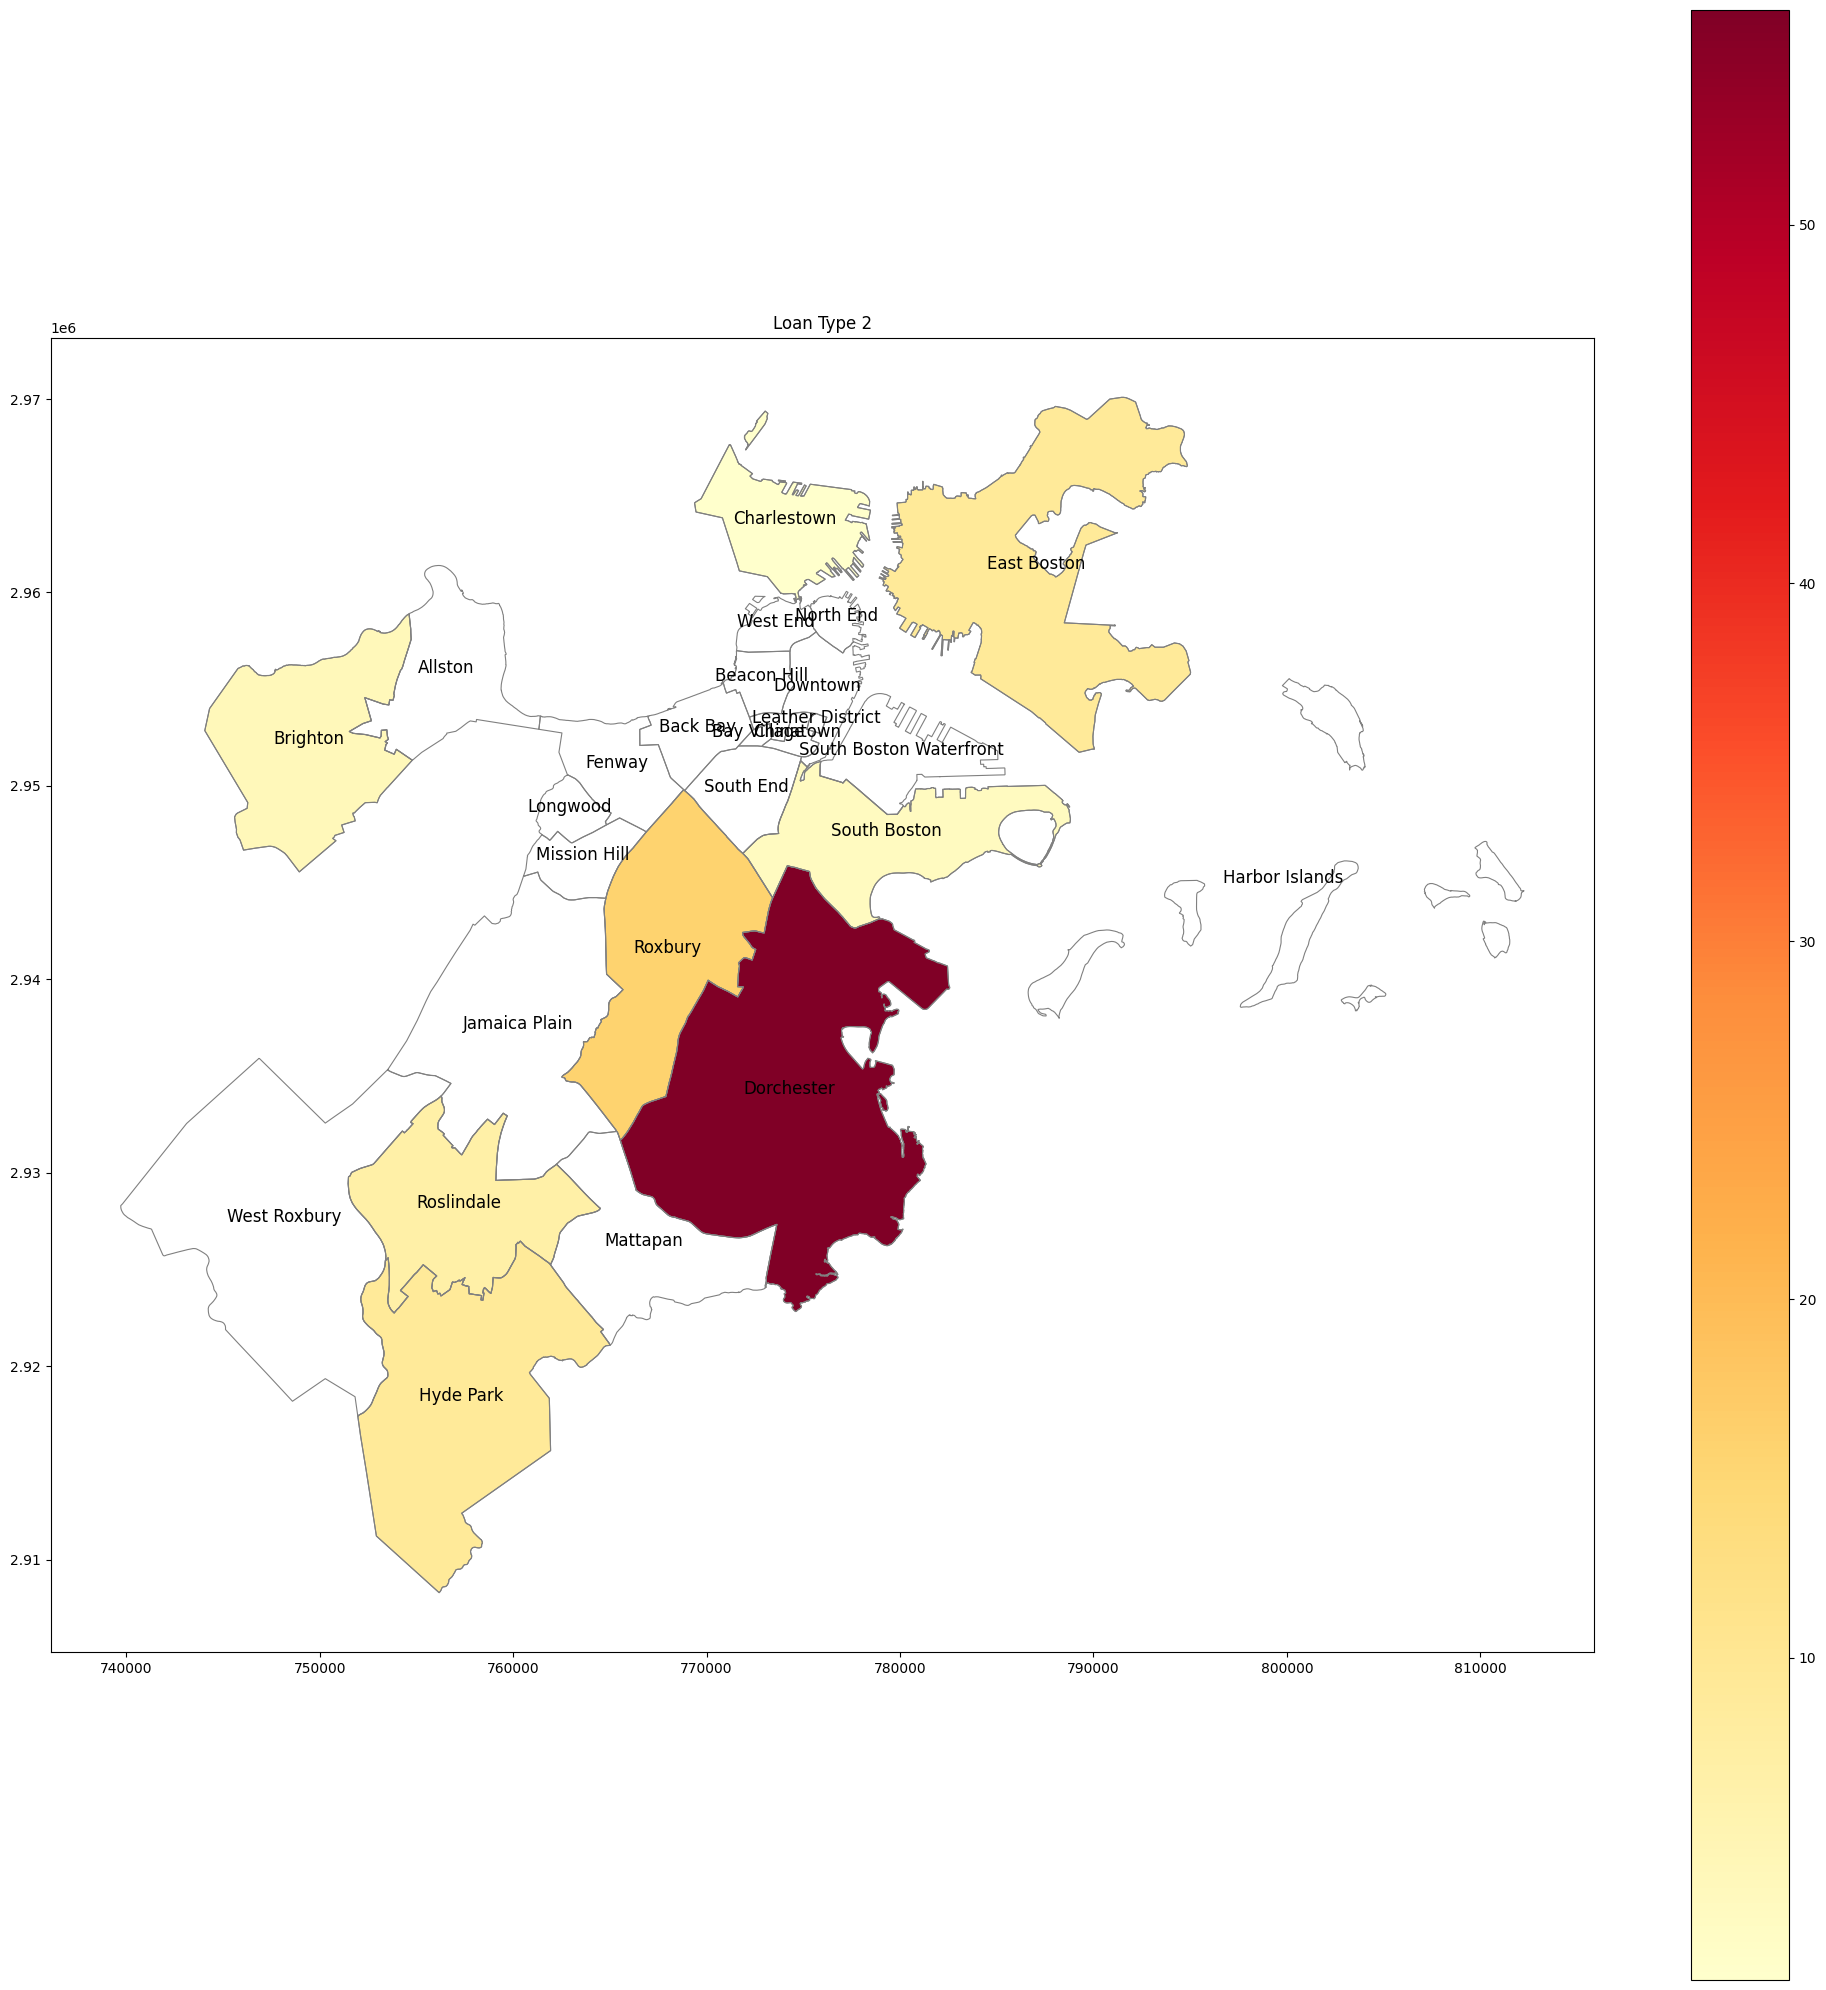

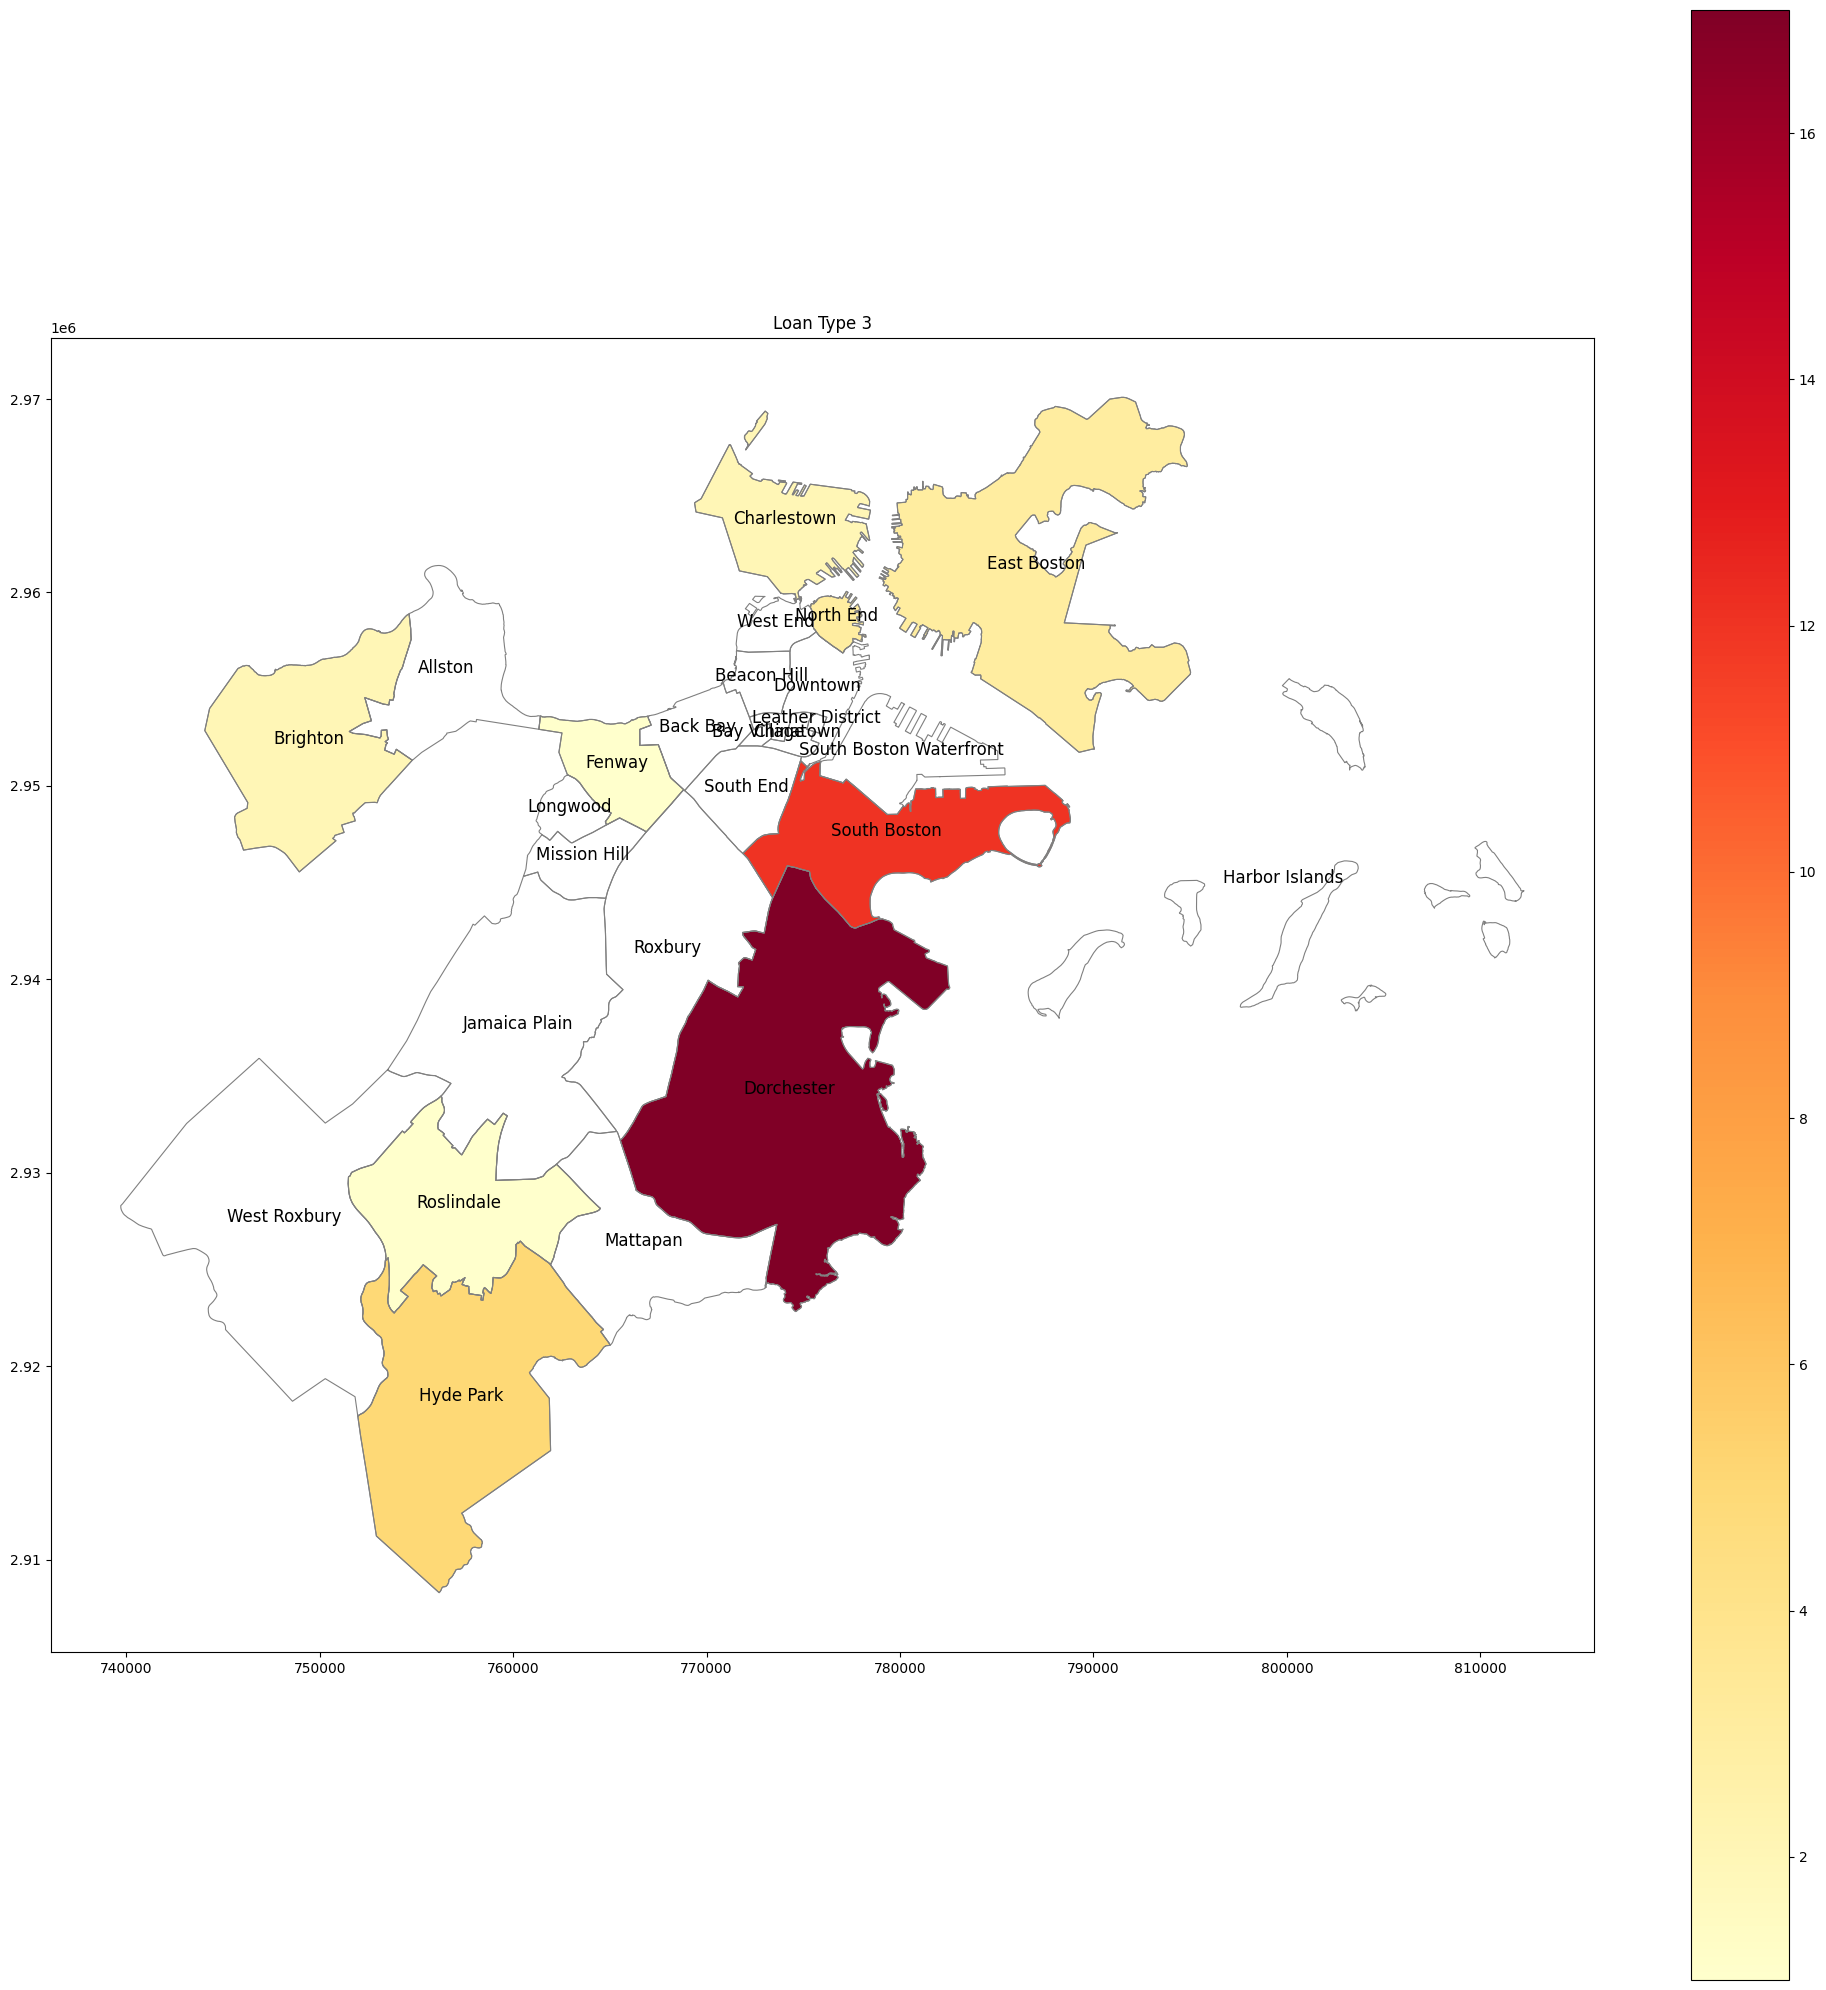

/Users/mirackchan/Library/Python/3.9/lib/python/site-packages/geopandas/plotting.py:693: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.



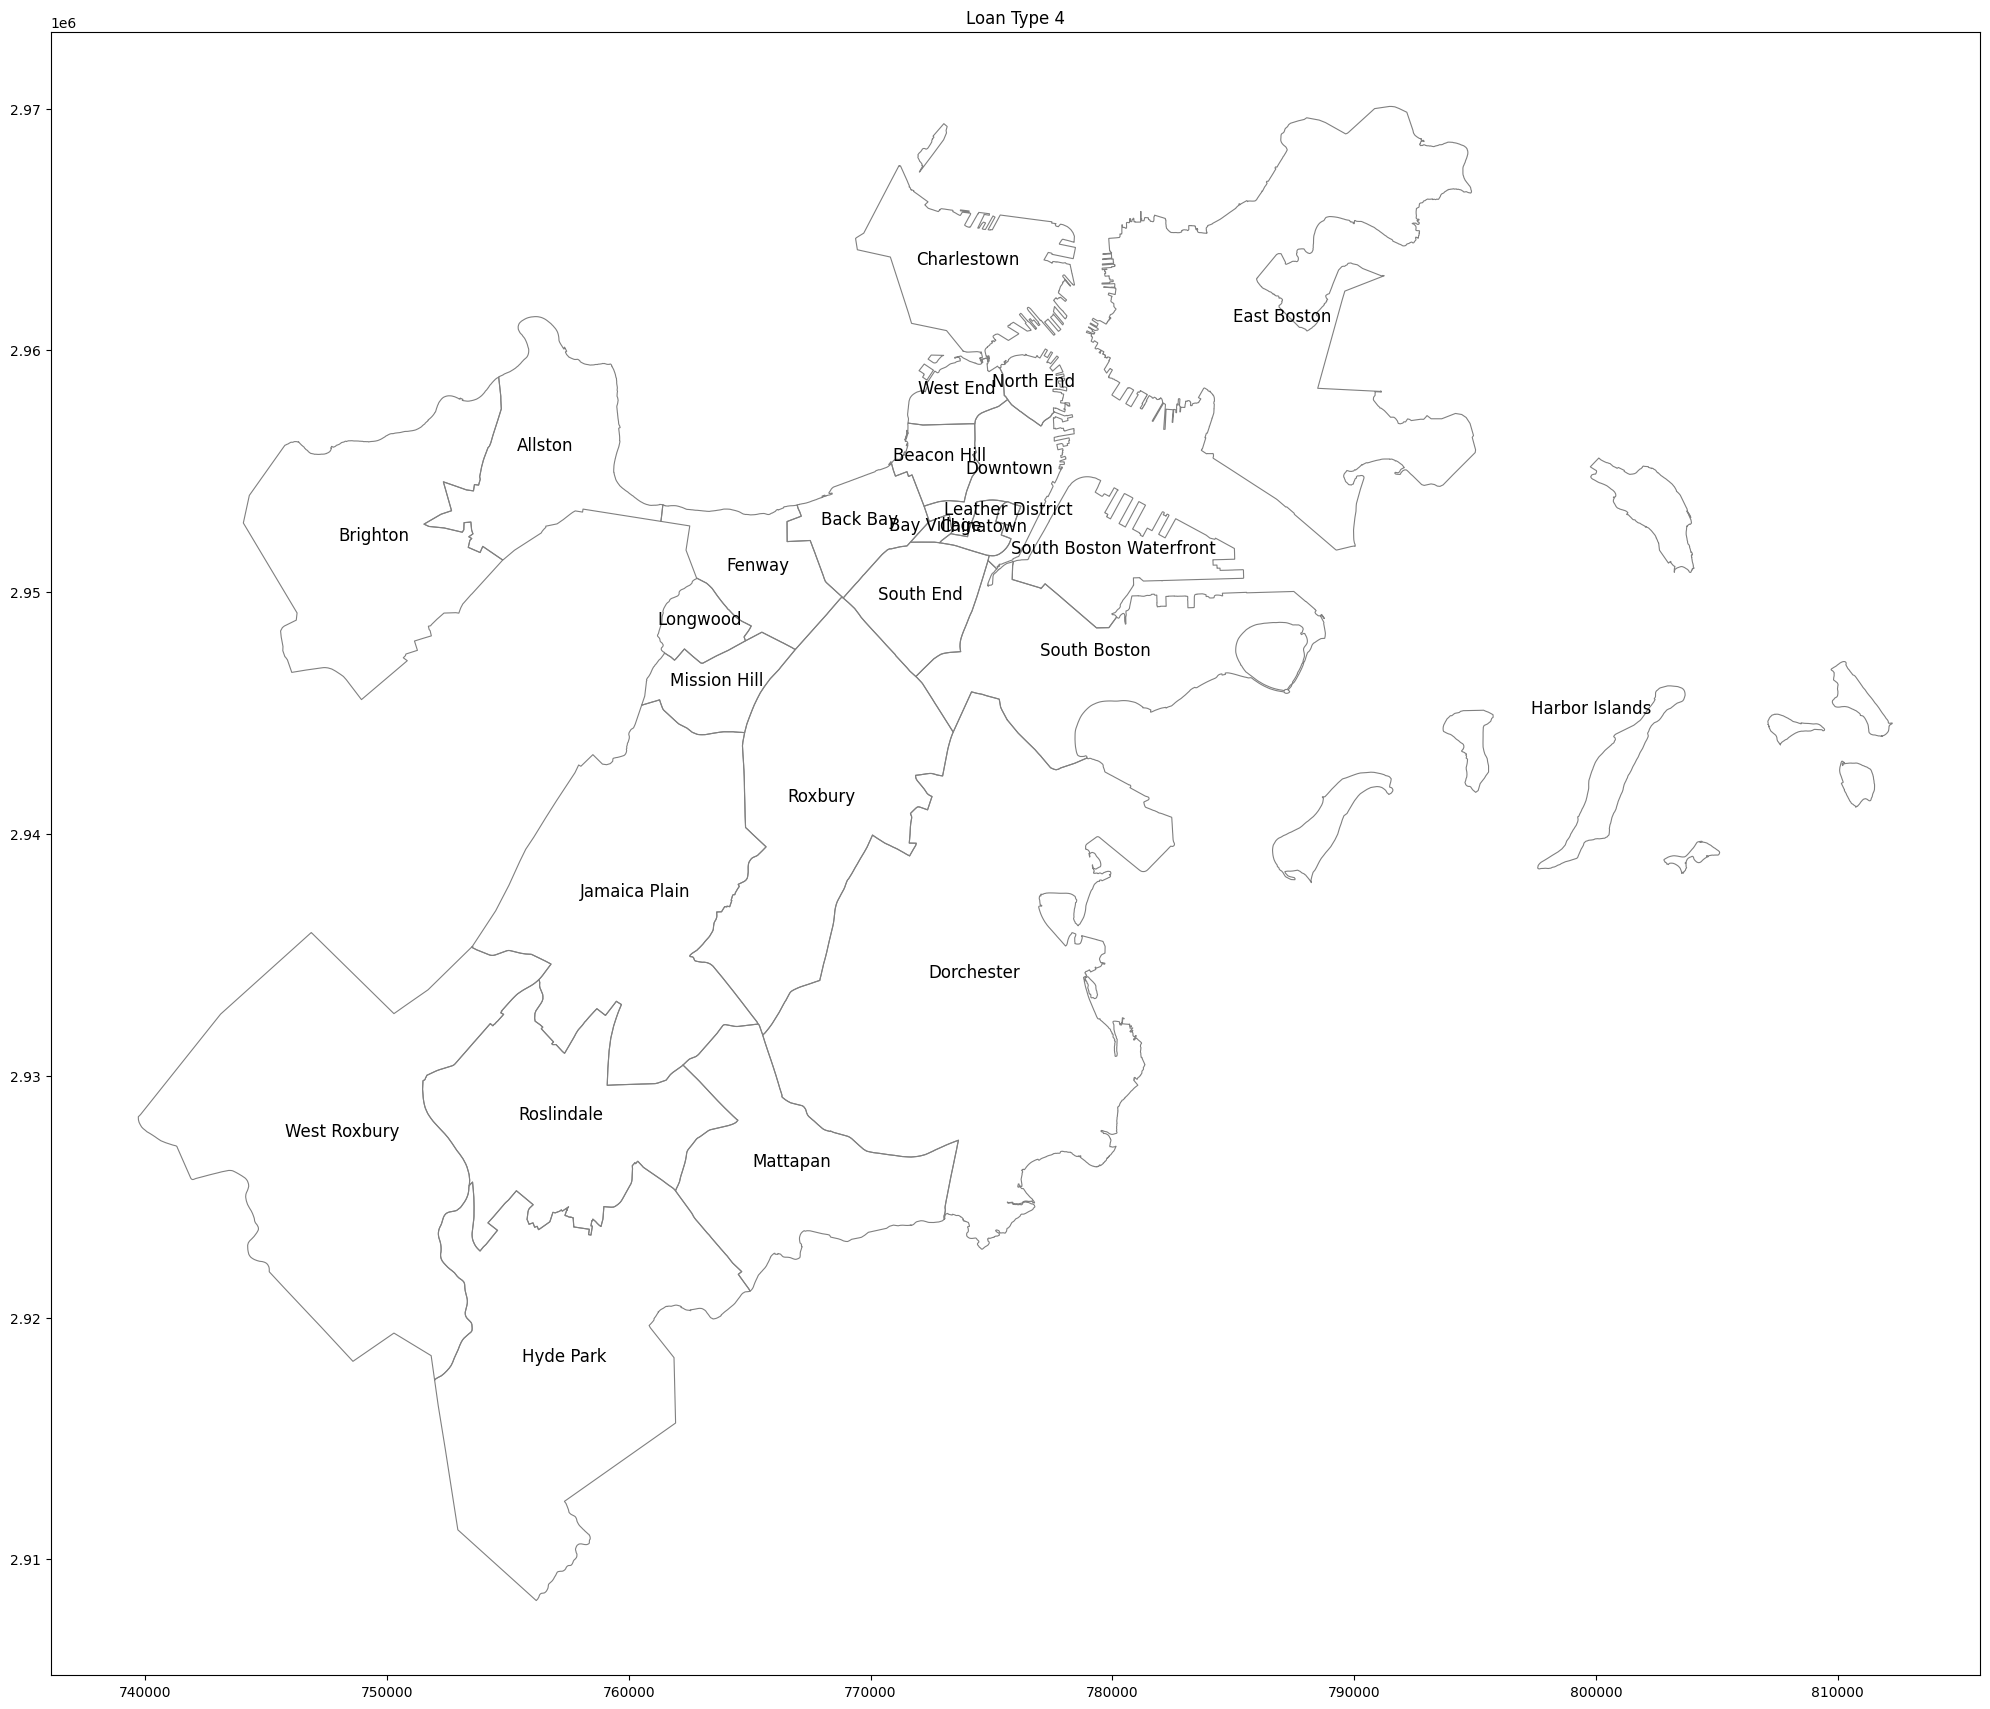

In [42]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

def add_neighborhood_names(ax, gdf):
    for _, row in gdf.iterrows():
        ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row["Name"], fontsize=12, ha="center")

# Load the shapefiles
shapefile_path2 = "../data/census_tract_data/Census2020_Tracts.shp"
tracts2 = gpd.read_file(shapefile_path2)
tracts2['GEOID20'] = tracts2['GEOID20'].astype(float)

shapefile_path1 = "../data/Boston_Neighborhoods/Boston_Neighborhoods.shp"
tracts1 = gpd.read_file(shapefile_path1)

# Read the loan counts CSV file
loan_counts = pd.read_csv("../data/loan_type_counts_by_censusTract.csv")
loan_counts.rename(columns={'census_tract': 'GEOID20'}, inplace=True)

# Merge the loan counts dataframe with the tracts2 geodataframe based on the census_tract column
merged_data = tracts2.merge(loan_counts, on="GEOID20")

# Perform a spatial join between the merged_data and tracts1 geodataframes
spatial_join_data = gpd.sjoin(merged_data, tracts1, op="within")

# Group by the Name column in tracts1 and sum the loan counts
aggregated_data = spatial_join_data.groupby(["Name", "loan_type"]).agg({"count": "sum"}).reset_index()

# Merge the aggregated data with tracts1 geodataframe based on the Name column
tracts1_merged = tracts1.merge(aggregated_data, on="Name")

# Separate the merged data into different geodataframes for each loan type
loan_type_1 = tracts1_merged[tracts1_merged["loan_type"] == 1]
loan_type_2 = tracts1_merged[tracts1_merged["loan_type"] == 2]
loan_type_3 = tracts1_merged[tracts1_merged["loan_type"] == 3]
loan_type_4 = tracts1_merged[tracts1_merged["loan_type"] == 4]

# Plot the choropleth maps for each loan type
def plot_loan_type(loan_type_data, title):
    fig, ax = plt.subplots(figsize=(20, 20))
    tracts1.boundary.plot(ax=ax, edgecolor="grey", linewidth=0.8)
    loan_type_data.plot(column="count", cmap="YlOrRd", edgecolor="grey", linewidth=0.8, legend=True, ax=ax)
    add_neighborhood_names(ax, tracts1)
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

plot_loan_type(loan_type_1, "Loan Type 1")
plot_loan_type(loan_type_2, "Loan Type 2")
plot_loan_type(loan_type_3, "Loan Type 3")
plot_loan_type(loan_type_4, "Loan Type 4")



In [3]:
import pandas as pd
import geopandas as gpd
import plotly.express as px

# Load the shapefile
shapefile_path2 = "../data/census_tract_data/Census2020_Tracts.shp"
tracts2 = gpd.read_file(shapefile_path2)
tracts2['GEOID20'] = tracts2['GEOID20'].astype(float)

# Read the loan counts CSV file
loan_counts = pd.read_csv("../data/loan_type_counts_by_censusTract.csv")
loan_counts.rename(columns={'census_tract': 'GEOID20'}, inplace=True)

# Merge the loan counts dataframe with the tracts2 geodataframe based on the census_tract column
merged_data = tracts2.merge(loan_counts, on="GEOID20")

# Convert the geodataframe to a dataframe with latitude and longitude columns
merged_data["lat"] = merged_data.geometry.centroid.y
merged_data["lon"] = merged_data.geometry.centroid.x
merged_data = pd.DataFrame(merged_data.drop(columns="geometry"))

# Create the 3D choropleth map using plotly
fig = px.scatter_3d(
    merged_data,
    x="lon",
    y="lat",
    z="loan_type",
    color="count",
    color_continuous_scale="YlOrRd",
    size="count",
    hover_name="GEOID20",
    opacity=0.7,
)

fig.update_layout(
    scene=dict(
        xaxis_title="Longitude",
        yaxis_title="Latitude",
        zaxis_title="Loan Type",
    ),
    coloraxis_colorbar=dict(title="Loan Count"),
)

fig.show()
